# Data Set 2 Week 1
## Cementing the skills learnt
### Analyzing a 120 sample of herbs according to sample type and pH.

In [58]:
# Importing relevant libraaries for analysis and visualization
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
# Loaading and reading the data set
data = pd.read_csv("week1_dataset_2_herbs.csv")
data.head()

,sample_id,species,sample_type,weight_mg,pH
0,1,Lavandula angustifolia,root,725.22,4.02
1,2,Rosmarinus officinalis,stem,174.03,6.18
2,3,Lavandula angustifolia,flower,241.07,8.45
3,4,Lavandula angustifolia,flower,420.81,5.69
4,5,Mentha spicata,flower,722.51,4.44


In [60]:
# obtaining the infor of the dataset to determine the types and null values if there are present
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sample_id    120 non-null    int64  
 1   species      120 non-null    object 
 2   sample_type  120 non-null    object 
 3   weight_mg    120 non-null    float64
 4   pH           120 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 4.8+ KB


In [61]:
#getting the statistical overview of the data
data.describe(include = "all").round(2)

,sample_id,species,sample_type,weight_mg,pH
count,120.00,120,120,120.00,120.00
unique,NaN,4,4,NaN,NaN
top,NaN,Lavandula angustifolia,root,NaN,NaN
freq,NaN,32,31,NaN,NaN
mean,60.50,NaN,NaN,408.64,6.18
std,34.79,NaN,NaN,232.24,1.37
min,1.00,NaN,NaN,15.87,4.02
25%,30.75,NaN,NaN,197.89,5.06
50%,60.50,NaN,NaN,428.51,5.92
75%,90.25,NaN,NaN,607.57,7.43


In [62]:
# group the samples by pH to determine which samples are acidic, basic and neutral
low_pH = data[data["pH"] < 6]
low_pH

,sample_id,species,sample_type,weight_mg,pH
0,1,Lavandula angustifolia,root,725.22,4.02
3,4,Lavandula angustifolia,flower,420.81,5.69
4,5,Mentha spicata,flower,722.51,4.44
7,8,Rosmarinus officinalis,stem,455.84,5.54
10,11,Curcuma longa,flower,587.55,4.94
...,...,...,...,...,...
114,115,Curcuma longa,root,717.03,4.53
115,116,Curcuma longa,root,44.15,5.35
116,117,Curcuma longa,stem,248.54,4.65
117,118,Rosmarinus officinalis,root,784.66,4.41


In [63]:
# obtain how many rows were filtered according to low pH
low_pH.shape

(61, 5)

In [64]:
high_pH = data[data["pH"] > 7.5]
high_pH

,sample_id,species,sample_type,weight_mg,pH
2,3,Lavandula angustifolia,flower,241.07,8.45
6,7,Lavandula angustifolia,leaf,213.46,8.33
8,9,Curcuma longa,stem,647.51,7.60
9,10,Lavandula angustifolia,root,321.55,7.59
15,16,Rosmarinus officinalis,stem,72.70,8.35
17,18,Curcuma longa,stem,171.59,7.89
22,23,Curcuma longa,stem,742.79,8.47
40,41,Mentha spicata,root,356.19,7.99
46,47,Mentha spicata,flower,276.28,8.37
47,48,Mentha spicata,leaf,742.79,7.92


In [65]:
high_pH.shape

(29, 5)

In [66]:
No_of_species = data["species"].value_counts().rename_axis("species").reset_index(name = "count")
No_of_species

,species,count
0,Lavandula angustifolia,32
1,Curcuma longa,30
2,Rosmarinus officinalis,29
3,Mentha spicata,29


In [67]:
average_weight = data.groupby("species")["weight_mg"].mean().round(2).reset_index()
average_weight.rename(columns= {"weight_mg": "average_weight"}, inplace = True)
average_weight

,species,average_weight
0,Curcuma longa,427.81
1,Lavandula angustifolia,421.93
2,Mentha spicata,396.16
3,Rosmarinus officinalis,386.61


In [68]:
average_weight.to_csv("average_weight_dataset2.csv", index = False)

In [69]:
# categorise samples by their pH
def pH_category(pH):
    if  pd.isna(pH):
        return "unknown"
    if pH < 6.5:
        return "acidic"
    if pH <= 7.5:
        return "neutral"
    else:
        return "basic"
data["pH_category"] = data["pH"].apply(pH_category)
data["pH_category"].value_counts().rename_axis("pH_category").reset_index(name = "count")

,pH_category,count
0,acidic,70
1,basic,29
2,neutral,21


In [70]:
data.head()

,sample_id,species,sample_type,weight_mg,pH,pH_category
0,1,Lavandula angustifolia,root,725.22,4.02,acidic
1,2,Rosmarinus officinalis,stem,174.03,6.18,acidic
2,3,Lavandula angustifolia,flower,241.07,8.45,basic
3,4,Lavandula angustifolia,flower,420.81,5.69,acidic
4,5,Mentha spicata,flower,722.51,4.44,acidic


In [71]:
data["weight_g"] = (data["weight_mg"]/1000).round(4)
data.head()

,sample_id,species,sample_type,weight_mg,pH,pH_category,weight_g
0,1,Lavandula angustifolia,root,725.22,4.02,acidic,0.7252
1,2,Rosmarinus officinalis,stem,174.03,6.18,acidic,0.1740
2,3,Lavandula angustifolia,flower,241.07,8.45,basic,0.2411
3,4,Lavandula angustifolia,flower,420.81,5.69,acidic,0.4208
4,5,Mentha spicata,flower,722.51,4.44,acidic,0.7225


In [72]:
data.to_csv("week1_dataset2_clean.csv", index = False)

In [73]:
# Group by Sample type
pH_by_sample_type = data.groupby(["sample_type", "pH_category"]).size().rename_axis(["sample_type", "pH_category"]).reset_index(name = "count")
pH_by_sample_type

,sample_type,pH_category,count
0,flower,acidic,17
1,flower,basic,7
2,flower,neutral,6
3,leaf,acidic,15
4,leaf,basic,8
5,leaf,neutral,6
6,root,acidic,21
7,root,basic,6
8,root,neutral,4
9,stem,acidic,17


In [74]:
plot_data = pH_by_sample_type.pivot(index = "sample_type", columns = "pH_category", values = "count").fillna(0)
plot_data

pH_category,acidic,basic,neutral
sample_type,,,
flower,17,7,6
leaf,15,8,6
root,21,6,4
stem,17,8,5


### Visualisations

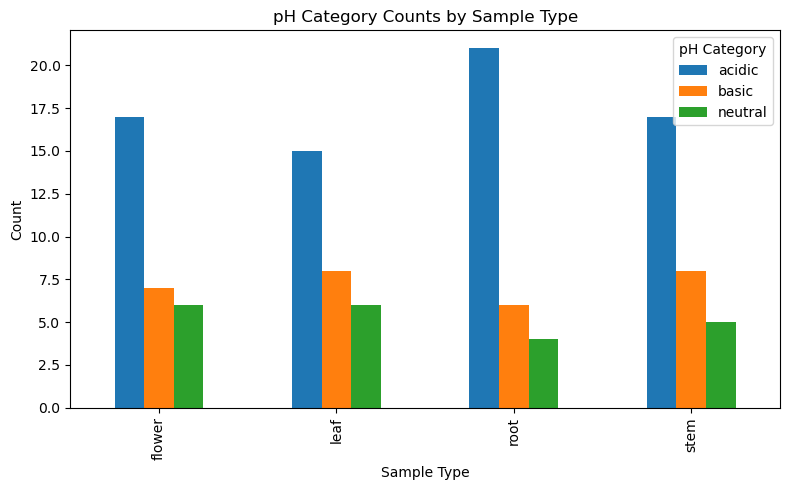

In [75]:
plot_data.plot(kind='bar', figsize=(8,5))

plt.title("pH Category Counts by Sample Type")
plt.xlabel("Sample Type")
plt.ylabel("Count")
plt.legend(title="pH Category")
plt.tight_layout()
plt.show()


In [76]:
plt.savefig("week1_ph_by_sample_type2.png", dpi=150)

<Figure size 640x480 with 0 Axes>

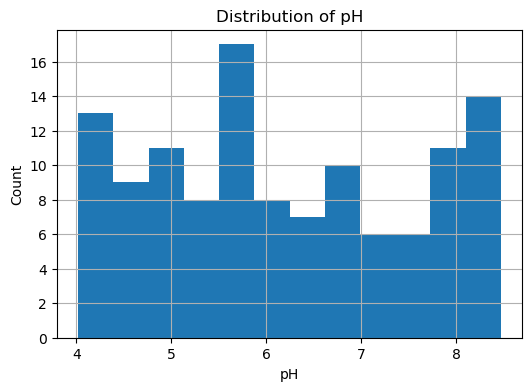

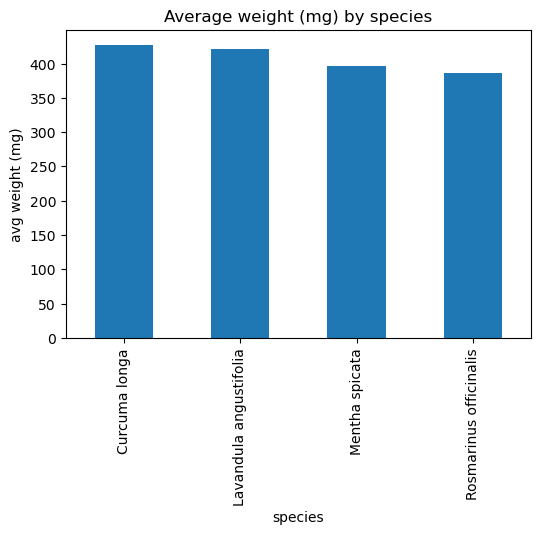

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.hist(data["pH"], bins=12)
plt.title("Distribution of pH")
plt.xlabel("pH")
plt.ylabel("Count")
plt.grid(True)
plt.show()

plt.figure(figsize=(6,4))
species_means = data.groupby("species")["weight_mg"].mean()
species_means.plot(kind="bar")
plt.title("Average weight (mg) by species")
plt.ylabel("avg weight (mg)")
plt.show()


In [78]:
plt.savefig("week1_data_overview2.png", dpi=150)

<Figure size 640x480 with 0 Axes>

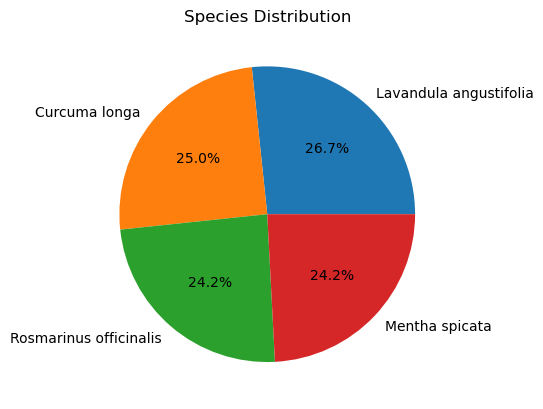

In [79]:
data["species"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Species Distribution")
plt.ylabel("")
plt.show()


In [80]:
# multi filtering
filter_results = data[(data["species"] == "Lavandula angustifolia") & (data["sample_type"]  == "flower") & (data["pH_category"] == "acidic")]
filter_results

,sample_id,species,sample_type,weight_mg,pH,pH_category,weight_g
3,4,Lavandula angustifolia,flower,420.81,5.69,acidic,0.4208
5,6,Lavandula angustifolia,flower,787.07,6.08,acidic,0.7871
37,38,Lavandula angustifolia,flower,711.41,5.32,acidic,0.7114
60,61,Lavandula angustifolia,flower,454.15,4.07,acidic,0.4542
67,68,Lavandula angustifolia,flower,445.76,6.43,acidic,0.4458
102,103,Lavandula angustifolia,flower,196.91,5.57,acidic,0.1969
113,114,Lavandula angustifolia,flower,648.15,5.10,acidic,0.6482


In [81]:
filter_results.to_csv("filtering_dataset2.csv", index = False)

In [82]:
filter_results_2 = data[(data["sample_type"] == "root") & (data["pH_category"] == "acidic")]
filter_results_2

,sample_id,species,sample_type,weight_mg,pH,pH_category,weight_g
0,1,Lavandula angustifolia,root,725.22,4.02,acidic,0.7252
14,15,Mentha spicata,root,786.98,4.86,acidic,0.7870
20,21,Lavandula angustifolia,root,83.73,6.26,acidic,0.0837
21,22,Mentha spicata,root,244.52,4.30,acidic,0.2445
27,28,Mentha spicata,root,48.38,5.05,acidic,0.0484
31,32,Rosmarinus officinalis,root,626.99,5.63,acidic,0.6270
33,34,Curcuma longa,root,252.11,5.65,acidic,0.2521
39,40,Curcuma longa,root,357.86,4.12,acidic,0.3579
41,42,Rosmarinus officinalis,root,614.43,4.07,acidic,0.6144
44,45,Rosmarinus officinalis,root,470.31,4.21,acidic,0.4703


In [83]:
#Finding outliers
cond_weight = data["weight_mg"] > 700
cond_low_ph = data["pH"] < 4.5
cond_high_ph = data["pH"] > 8.2

outliers= data[cond_weight| cond_low_ph | cond_high_ph]
outliers.head()

,sample_id,species,sample_type,weight_mg,pH,pH_category,weight_g
0,1,Lavandula angustifolia,root,725.22,4.02,acidic,0.7252
2,3,Lavandula angustifolia,flower,241.07,8.45,basic,0.2411
4,5,Mentha spicata,flower,722.51,4.44,acidic,0.7225
5,6,Lavandula angustifolia,flower,787.07,6.08,acidic,0.7871
6,7,Lavandula angustifolia,leaf,213.46,8.33,basic,0.2135


In [95]:
outliers_by_species = outliers["species"].value_counts()
outliers_by_species


species
Lavandula angustifolia    10
Rosmarinus officinalis    10
Curcuma longa              9
Mentha spicata             8
Name: count, dtype: int64

In [84]:
grouped = data.groupby("pH_category")
summary_stats =grouped["weight_mg"].agg(["mean", "max", "min", "median"]).round(4)
summary_stats

,mean,max,min,median
pH_category,,,,
acidic,419.4210,796.91,15.87,444.245
basic,370.9483,791.34,47.40,339.660
neutral,424.7467,746.23,35.44,436.210


In [85]:
percent_table = pd.crosstab(
    data["species"], 
    data["pH_category"], 
    normalize="index"
).round(2)


In [86]:
percent_table

pH_category,acidic,basic,neutral
species,,,
Curcuma longa,0.60,0.17,0.23
Lavandula angustifolia,0.56,0.28,0.16
Mentha spicata,0.52,0.31,0.17
Rosmarinus officinalis,0.66,0.21,0.14


In [90]:
# Stability index
stability_index = data["weight_g"] * data["pH"]
data["stability_index"] = data["weight_g"] * data["pH"]
data.head()


,sample_id,species,sample_type,weight_mg,pH,pH_category,weight_g,stability_index
0,1,Lavandula angustifolia,root,725.22,4.02,acidic,0.7252,2.915304
1,2,Rosmarinus officinalis,stem,174.03,6.18,acidic,0.1740,1.075320
2,3,Lavandula angustifolia,flower,241.07,8.45,basic,0.2411,2.037295
3,4,Lavandula angustifolia,flower,420.81,5.69,acidic,0.4208,2.394352
4,5,Mentha spicata,flower,722.51,4.44,acidic,0.7225,3.207900


In [92]:
data.groupby("species")["stability_index"].mean().round(2)

species
Curcuma longa             2.55
Lavandula angustifolia    2.58
Mentha spicata            2.55
Rosmarinus officinalis    2.22
Name: stability_index, dtype: float64

In [94]:
data.groupby("sample_type")["stability_index"].mean().round(3)

sample_type
flower    2.359
leaf      2.332
root      2.723
stem      2.481
Name: stability_index, dtype: float64